<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/ArkoseLabs/blob/main/Arkose_Labs_Security_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connection to Google Drive where I uploaded two (2) files containing movie-related data pulled from IMDB:


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data importation

In [27]:
import pandas as pd
titles = pd.read_csv('/content/drive/MyDrive/Arkose_Labs/title_basics_2018.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Arkose_Labs/title_ratings.csv')


# Data Overview

In [28]:
titles.head()


,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
1,tt0111414,A Thin Life,A Thin Life,2018,75,Comedy
2,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60,Documentary
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104,Drama
4,tt0253093,Gangavataran,Gangavataran,2018,134,\N


In [29]:
print("The titles table has {:,} rows of {} columns".format(titles.shape[0], titles.shape[1]))

The titles table has 12,815 rows of 6 columns


In [30]:
print("Titles has {:,} unique identifiers. There are no duplicated films to distort statistics".format(len(titles['tconst'].unique())))

Titles has 12,815 unique identifiers. There are no duplicated films to distort statistics


In [31]:
print("Titles table have only films from the year {}. The titles Table does no requires filtering ".format(titles['year'].unique()[0]))

Titles table have only films from the year 2018. The titles Table does no requires filtering 


In [32]:
titles.dtypes

tconst            object
primaryTitle      object
originalTitle     object
year               int64
runtimeMinutes     int64
genres            object
dtype: object

In [33]:
sorted_runtime=sorted(titles['runtimeMinutes'].unique())
print("Titles runtimes in minutes range from a minimum of {} to a maximum of {:,} minutes".format(sorted_runtime[0], sorted_runtime[len(sorted_runtime)-1]))

Titles runtimes in minutes range from a minimum of 1 to a maximum of 1,320 minutes


## A runtime in minutes of 1 minute or 1,230 awoke my curiosity.

I wanted to know film titles with such runtimes to check it against the real data source www.imdb.com

[For a better life](https://www.imdb.com/title/tt9124086/),  according to IMDB has 1 minute.

[Solitude](https://www.imdb.com/title/tt10514454/), according to IMDB has 1 minute.

[Time to Stir](https://www.imdb.com/title/tt1277455/?ref_=fn_al_tt_1) last 22 hours so it si ok


In [34]:
shortest = (titles['runtimeMinutes'] == 1)
pd.set_option('display.max_rows', None)
print(titles[shortest][['tconst','originalTitle']])

           tconst      originalTitle
395    tt10514454           Solitude
11255   tt9124086  For A Better Life


In [35]:
longest = (titles['runtimeMinutes'] == 1320)
pd.set_option('display.max_rows', None)
print(titles[longest][['tconst','originalTitle']])

        tconst   originalTitle
830  tt1277455  A Time to Stir


In [36]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1543
1,tt0000002,6.1,186
2,tt0000003,6.5,1201
3,tt0000004,6.2,114
4,tt0000005,6.1,1921


In [37]:
ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [38]:
print("The titles table has {:,} rows of {} columns".format(ratings.shape[0], ratings.shape[1]))

The titles table has 985,459 rows of 3 columns


In [39]:
print("The titles table has {:,} unique identifiers. There are no duplicated films to distort statistics".format(len(ratings['tconst'].unique())))

The titles table has 985,459 unique identifiers. There are no duplicated films to distort statistics


# Data Transformation

I use both data sources, titles & ratings, to create a data model having titles's columns plus ratings columns

## To join both datasets I use pd.merge **on the left**.

On the left I place titles, cause I want to add ratings on the right. I am only interested in titles with ratings, but I want to know how many titles do not have ratings.

In [40]:
model = pd.merge(titles, ratings, on='tconst', how='left', indicator=True)
titles_without_ratings = model[model['_merge'] == 'left_only']
titles_with_ratings = model[model['_merge'] == 'both']
print("From the {:,} titles available in the titles table, only {:,} have ratings. The other {:,} titles do not have ratings.".format(model.shape[0],titles_with_ratings.shape[0],titles_without_ratings.shape[0]))

From the 12815 titles available in the titles table, only 7229 have ratings. The other 5586 titles do not have ratings.


# Data Analysis

### How many 2018 films were categorized as a Comedy?

Previously I checked that in the Titles table, there were only titles from 2018.

I check either for "Comedy" or "comedy", in case some exist. I set a filter to show only films such as the genres field containing the string "Comedy" or "comedy".

I check in the data model, in all titles, having or not ratings.


In [41]:
filter = (model['genres'].str.contains('Comedy') |model['genres'].str.contains('comedy'))
print("The titles table has {} films categorized as Comedy|comedy".format(model[filter].shape[0]))

The titles table has 2233 films categorized as Comedy|comedy


### How many 2018 films got a score of 8.0 or higher.?
Previously I checked that in the Titles table, there were only titles from 2018.

Now I filter the titles with ratings.


In [42]:
filter = (titles_with_ratings['averageRating'] >= 8.0)
print("The number of films from 2018 having scores equal to or higher than 8.0 is {}.".format(titles_with_ratings[filter].shape[0]))

The number of films from 2018 having scores equal to or higher than 8.0 is 780.


### What was the best film of 2018?

My first approach was:

The one with the highest score. Then I set a filter for titles with an Average Rating equal to the maximum Average rating.

In [43]:
filter = (titles_with_ratings['averageRating'] == titles_with_ratings['averageRating'].max())
titles_with_ratings[filter]

,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres,averageRating,numVotes,_merge
166,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52,Documentary,10.0,5.0,both


But it seems to me unfair to give the prize to a title with only 5 votes.

I wondered which was the film with more votes

In [44]:
filter = (titles_with_ratings['numVotes'] == titles_with_ratings['numVotes'].max())
titles_with_ratings[filter]

,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres,averageRating,numVotes,_merge
1386,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",8.5,719146.0,both


That brought me to my second approach:

The best film of 2018 will have the best average rating weighted by numvotes.

¿How many votes were issued for 2018 films?

The weight coefficient for each film will be numvotes divided by total votes.

The weight coefficient multiplies averageRating to get weigthedRating.

The maximum weighted Average will be the best film.

In [45]:
total_votes = titles_with_ratings['numVotes'].sum()
print("The total num of votes for 2018 films was {:,.0f}".format(total_votes))

The total num of votes for 2018 films was 18,715,252


In [46]:
new_ratings = titles_with_ratings.copy()
new_ratings['weightedRating']= titles_with_ratings['averageRating'] * (titles_with_ratings['numVotes'] / total_votes)
filter = (new_ratings['weightedRating'] == new_ratings['weightedRating'].max())
result = new_ratings[filter][['originalTitle', 'averageRating', 'numVotes', 'weightedRating']].to_dict('records')
result

[{'originalTitle': 'Avengers: Infinity War',
  'averageRating': 8.5,
  'numVotes': 719146.0,
  'weightedRating': 0.32661815080021367}]

In [47]:
result[0]['originalTitle']

'Avengers: Infinity War'

In [48]:
print("The best film from 2018 was {}. It got {:,.0f} votes. The average rating was {}.".format(result[0]['originalTitle'], result[0]['numVotes'], result[0]['averageRating']))

The best film from 2018 was Avengers: Infinity War. It got 719,146 votes. The average rating was 8.5.


### Do audiences prefer longer films, or shorter films?

I try first with a scatter plot of runtime versus weighted rating.


<Axes: xlabel='weightedRating', ylabel='runtimeMinutes'>

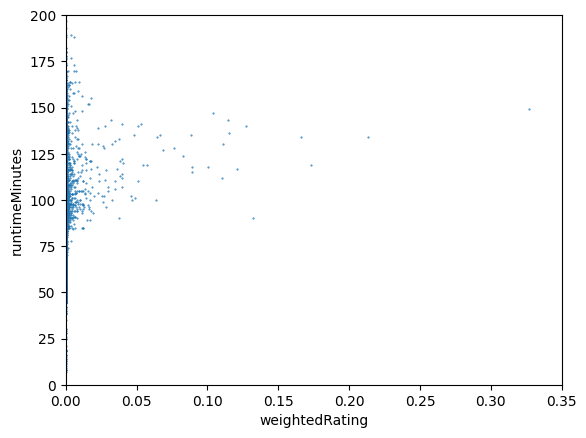

In [49]:
new_ratings.plot.scatter(y='runtimeMinutes', x = 'weightedRating', s=0.2, ylim=[0, 200], xlim=[0, 0.35])

Apparently,  there is a growing slope.

Let's calculate the regression

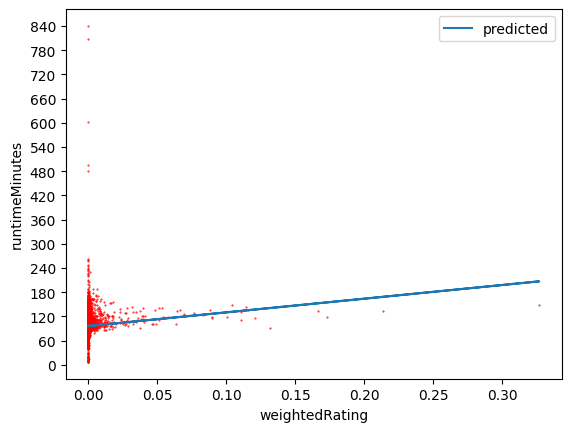

In [55]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(new_ratings['weightedRating']).reshape(-1, 1)
y = np.array(new_ratings['runtimeMinutes'])
# fit the model
reg = LinearRegression().fit(X, y)
new_ratings['predicted'] = reg.predict(X)

fig, ax = plt.subplots()
new_ratings.plot.scatter(x = 'weightedRating', y = 'runtimeMinutes', s = 0.2,   c = 'red', ax = ax, yticks=[0,60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840])
new_ratings.plot.line(x = 'weightedRating', y = 'predicted', ax = ax)
plt.show()

My conclusion is that audiences prefer long films to short films. The higher the weighted rating, the longer the film.